Solución Oliver

In [8]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# Función para verificar si un punto (x, y) está dentro de la región
def punto_esta_dentro(x, y):
    return x**2 + 2*y**2 <= -2*x + 8*y - 7

# Función para aproximar el área de la región utilizando Monte Carlo
def aproximar_area_monte_carlo(num_puntos):
    puntos_dentro = 0
    a1, b1, a2, b2 = -2, 2, 0, 4  # Límites adecuados para la región

    for _ in range(num_puntos):
        x = random.uniform(a1, b1)
        y = random.uniform(a2, b2)
        if punto_esta_dentro(x, y):
            puntos_dentro += 1

    # Área total de la región rectangular
    area_total = (b1 - a1) * (b2 - a2)

    # Aproximación del área de la región
    area_aproximada = area_total * (puntos_dentro / num_puntos)

    return area_aproximada

# Números de términos para la aproximación
num_terminos = [1, 10, 100, 1000, 10000, 100000]

# Crear una lista de resultados
resultados = []

# Inicializar la variable de área aproximada anterior
area_aproximada_anterior = None

# Calcular los resultados
for num in num_terminos:
    area_aproximada = aproximar_area_monte_carlo(num)
    error_relativo = (abs(area_aproximada - area_aproximada_anterior) / area_aproximada_anterior) if area_aproximada_anterior is not None else 0
    area_aproximada_anterior = area_aproximada
    resultados.append([num, area_aproximada, error_relativo])

# Crear un DataFrame de Pandas con los resultados
df = pd.DataFrame(resultados, columns=["Cantidad de Términos", "Área Aproximada", "Error Relativo"])

# Mostrar la tabla
df



ZeroDivisionError: float division by zero

solución Andrea

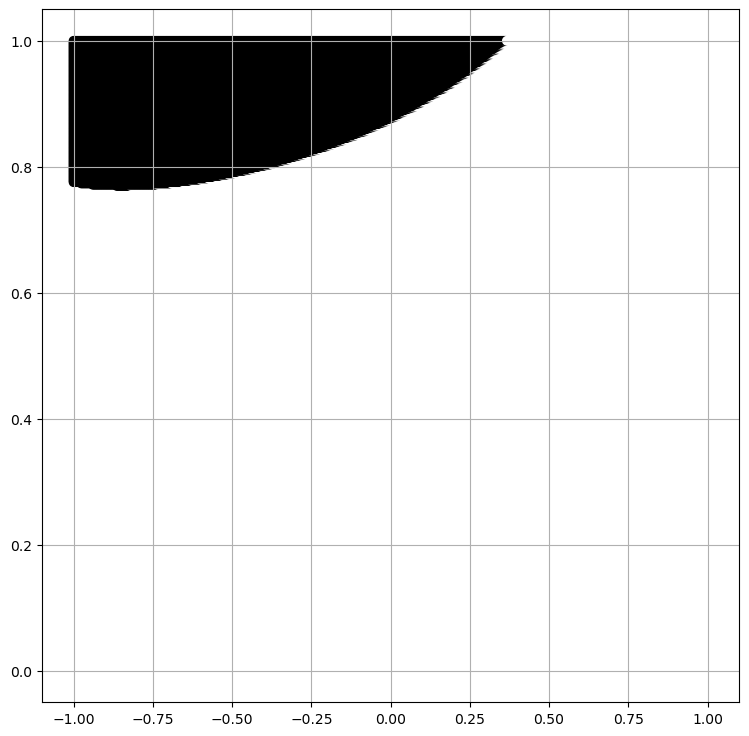

,Aproximación
10,0.2
100,0.14
1000,0.208
10000,0.2216
100000,0.2231
1000000,0.225114
10000000,0.22453


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Escribir la función acá
def montecarlo2(region, a1, b1, a2, b2, N):
    AR = (b1-a1)*(b2-a2)
    x = np.random.uniform(a1, b1, N)
    y = np.random.uniform(a2, b2, N)
    bi = region(x, y)
    AD_approx = AR*np.mean(bi)
    return AD_approx

def region(x, y):
    return x**2*2*y**2<= -2*x +8*y-7
xnum = np.linspace(-1, 1, 500)
ynum = np.linspace(0, 1, 500)

X, Y = np.meshgrid(xnum, ynum)

##~
plt.figure(figsize=(9, 9))

# Grafica los puntos del rectangulo R que estan dentro de la region D
plt.scatter(X, Y, c=~region(X,Y), cmap='bone') 

plt.grid()
plt.show()

# Resolver
a1, b1, a2, b2 = -1, 1, 0, 1

# Cantidad de términos a utilizar para la aproximación
N = np.logspace(1, 7, 7).astype(int)

# Crear la tabla (DataFrame de pandas)
tabla1 = pd.DataFrame(index = N, columns=['Aproximación'])

for n in N:
    area_aprox = montecarlo2(region, a1, b1, a2, b2, n)
    tabla1.loc[n, 'Aproximación'] = area_aprox


tabla1